### ```Q1. Run selection sort on K random lists of size N and compute the mean and standard deviation of the running times. Repeat this M times, so you should report M pairs of the form (mean_run_time, std_deviation).```

*   K should be at least 100
*   N should be at least 5000 for the first two questions
*   M should be atleast 5.




In [ ]:
def selectionsort(L):
  if len(L) <= 1:
    return L
  for i in range(len(L)):
    minpos = i
    for j in range(i, len(L)):
      if L[j] < L[i]:
        L[i], L[j] = L[j], L[i]
  return(L)
# selection sort on 100 lists of size 5000 to get a list [t1, t2, ..., t100] --> (mean, std)
def timed_mean_std_ss(N, K, M):
  import numpy as np
  import time
  arr, arr1 = [], []
  for i in range(M):
    for j in range(K):
      l = np.random.randint(0, high=10**9, size=N)
      start = time.time()
      sorted_arr = selectionsort(l)
      end = time.time()
      arr.append(end-start)
    arr1.append((np.mean(arr), np.std(arr)))
  return(arr1)

In [ ]:
# N = 5000
# K = 100
# M = 5
timed_mean_std_ss(5000, 100, 5)

[(6.127072370052337, 0.7296877221591664),
 (6.126738940477371, 0.7351363933721966),
 (6.127500935395559, 0.7400317035283942),
 (6.130091564655304, 0.7421166153242965),
 (6.133184086799622, 0.732914674971768)]

### ```Q2. Run (iterative) insertion sort on K random lists of size N and compute the mean and standard deviation of the running times. Repeat this M times, so you should report M pairs of the form (mean_run_time, std_deviation).```

*   K should be at least 100
*   N should be at least 5000 for the first two questions
*   M should be atleast 5


In [ ]:
def insertion_sort(L):
  n = len(L)
  if n < 1:
    return L
  for i in range(n):
    j = i
    while(j>0 and L[j-1]> L[j]):
      (L[j-1], L[j]) = (L[j], L[j-1])
      j = j-1
  return L
# insertion sort on 100 lists of size 5000 to get a list [t1, t2, ..., t100] --> (mean(ti), std(ti))--> 5times
def timed_mean_std_is(N, K, M):
  import numpy as np
  import time
  arr, arr1 = [], []
  for i in range(M):
    for j in range(K):
      l = np.random.randint(0, high=10**9, size=N)
      start = time.time()
      sorted_arr = insertion_sort(l)
      end = time.time()
      arr.append(end-start)
    arr1.append((np.mean(arr), np.std(arr)))
  return(arr1)

In [ ]:
# N = 5000
# K = 100
# M = 5
timed_mean_std_is(5000, 100, 5)

[(5.015035834312439, 0.6357529733104189),
 (4.939864745140076, 0.5647328480893219),
 (4.913839240074157, 0.5372163388152047),
 (4.898391734361649, 0.5168818488869791),
 (4.888049826145172, 0.509317751172287)]

### ```Q3. Implement a variant of mergesort that switches to (iterative) insertion sort when the list length is less than than cutoff. Run this hybrid merge-iteration sort on K random lists of size N and compute the mean and standard deviation of the running times. Repeat this M times, so you should report M pairs of the form (mean_run_time, std_deviation). Try this for different values of cutoff below 100, including cutoff = 0.```

*   K should be at least 100
*   N should be at least 50000 for the last two questions
*   M should be atleast 5
*   For the last two questions, use at least 5 values of cutoff, other than cutoff = 0. If the performance improves for any value of cutoff > 0, try to find an optimum value for cutoff




In [ ]:
#iterative insertion sort
def insertion_sort(L):
  n = len(L)
  if n < 1:
    return L
  for i in range(n):
    j = i
    while(j>0 and L[j-1]> L[j]):
      (L[j-1], L[j]) = (L[j], L[j-1])
      j = j-1
  return L

#merge sort
def merge(A,B):
  (m,n) = (len(A), len(B))
  (C,i,j,k) = ([],0,0,0)
  while (k < m+n):
    if i == m:
     C.extend(B[j:])
     k = k + (n-j)
    elif j == n:
     C.extend(A[i:])
     k = k + (m-i)
    elif (A[i]<B[j]):
     C.append(A[i])
     (i,k) = (i+1, k+1)
    else:
     C.append(B[j])
     (j,k) = (j+1, k+1)
  return C
def mergesort(A):
  n = len(A)
  if n <= 1:
     return A
  else:
    L = mergesort(A[:n//2])
    R = mergesort(A[n//2:])
    B = merge(L,R)
  return B

``` We make a dctionary of K lists of size N to use in Q3. and Q4.```

In [ ]:
import numpy as np #N = 50000, #K = 100
np.random.seed(0)
dic = {}
for i in range(100): #K
  dic[i] = np.random.randint(0, high=10**10, size=50000) #N
print(dic)
hybrid_quick_sort(a, 0, 20)

{0: array([2546248239, 7921061056, 6973152979, ..., 2858844314, 8377332261,
       3288574364]), 1: array([4613268778,  699404226, 5265362553, ..., 7928200128, 8117635645,
       4927899158]), 2: array([6300877861, 2229889810, 1486737382, ..., 5754577583,  794962896,
       6466564886]), 3: array([5025417022, 4030456089, 2690658149, ..., 8639048107, 9694853515,
       4561121259]), 4: array([5618545663, 2827888083, 7246872427, ..., 4323746600, 1974167049,
       2734685670]), 5: array([9981795176, 5675581747, 8293502682, ...,   49592425, 1301491218,
       5602506199]), 6: array([9893014321, 1581254482, 4932739468, ..., 1043649569, 3041538304,
       2615267334]), 7: array([4264722180, 4034381084, 3503165347, ..., 8296761013, 9471585828,
       3711271242]), 8: array([5122035715,  441577855, 1277240756, ..., 2531460961,  371304107,
       5590734886]), 9: array([9866180356, 2580013043, 8898031696, ..., 4861653900, 1228200221,
       7737463619]), 10: array([6007707404, 9429576070, 7287

``` N = 50000, K = 100, M = 5, cutoff = [0, 20, 40, 60, 80, 100]```

```cutoff = 0```

In [ ]:
def insertion_sort(arr, low, n):
    for i in range(low + 1, n + 1):
        val = arr[i]
        j = i
        while j>low and arr[j-1]>val:
            arr[j]= arr[j-1]
            j-= 1
        arr[j]= val
def partition(arr, low, high):
    pivot = arr[high]
    i = j = low
    for i in range(low, high):
        if arr[i]<pivot:
            a[i], a[j]= a[j], a[i]
            j+= 1
    a[j], a[high]= a[high], a[j]
    return j
def quick_sort(arr, low, high):
    if low<high:
        pivot = partition(arr, low, high)
        quick_sort(arr, low, pivot-1)
        quick_sort(arr, pivot + 1, high)
        return arr
def hybrid_quick_sort(arr, low, high):
    while low<high:
        if high-low + 1<0:
            insertion_sort(arr, low, high)
            break
        else:
            pivot = partition(arr, low, high)
            if pivot-low<high-pivot:
                hybrid_quick_sort(arr, low, pivot-1)
                low = pivot + 1
            else:
                hybrid_quick_sort(arr, pivot + 1, high)
                high = pivot-1

a = dic[3]
start = time.time()
quicksort(dic[3], 0, 49999)
end = time.time()
print(end-start)

RecursionError: ignored

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
arr, arr1 = [], []
for i in range(5): #M
  for j in range(100): #K
    a = dic[j]
    start = time.time()
    hybrid_quick_sort(dic[j],0,len(dic[j])-1)
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1

KeyboardInterrupt: ignored

```cutoff = 20```

In [ ]:
def insertion_sort(arr, low, n):
    for i in range(low + 1, n + 1):
        val = arr[i]
        j = i
        while j>low and arr[j-1]>val:
            arr[j]= arr[j-1]
            j-= 1
        arr[j]= val
def partition(arr, low, high):
    pivot = arr[high]
    i = j = low
    for i in range(low, high):
        if arr[i]<pivot:
            a[i], a[j]= a[j], a[i]
            j+= 1
    a[j], a[high]= a[high], a[j]
    return j
def quick_sort(arr, low, high):
    if low<high:
        pivot = partition(arr, low, high)
        quick_sort(arr, low, pivot-1)
        quick_sort(arr, pivot + 1, high)
        return arr
def hybrid_quick_sort(arr, low, high):
    while low<high:
        if high-low + 1<20:
            insertion_sort(arr, low, high)
            break

        else:
            pivot = partition(arr, low, high)
            if pivot-low<high-pivot:
                hybrid_quick_sort(arr, low, pivot-1)
                low = pivot + 1
            else:
                hybrid_quick_sort(arr, pivot + 1, high)
                high = pivot-1

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
arr, arr1 = [], []
for i in range(5): #M
  for j in range(100): #K
    a = dic[j]
    start = time.time()
    hybrid_quick_sort(dic[j],0,len(dic[j])-1)
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1

```cutoff = 40```

In [ ]:
def insertion_sort(arr, low, n):
    for i in range(low + 1, n + 1):
        val = arr[i]
        j = i
        while j>low and arr[j-1]>val:
            arr[j]= arr[j-1]
            j-= 1
        arr[j]= val
def partition(arr, low, high):
    pivot = arr[high]
    i = j = low
    for i in range(low, high):
        if arr[i]<pivot:
            a[i], a[j]= a[j], a[i]
            j+= 1
    a[j], a[high]= a[high], a[j]
    return j
def quick_sort(arr, low, high):
    if low<high:
        pivot = partition(arr, low, high)
        quick_sort(arr, low, pivot-1)
        quick_sort(arr, pivot + 1, high)
        return arr
def hybrid_quick_sort(arr, low, high):
    while low<high:
        if high-low + 1<40:
            insertion_sort(arr, low, high)
            break

        else:
            pivot = partition(arr, low, high)
            if pivot-low<high-pivot:
                hybrid_quick_sort(arr, low, pivot-1)
                low = pivot + 1
            else:
                hybrid_quick_sort(arr, pivot + 1, high)
                high = pivot-1

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
arr, arr1 = [], []
for i in range(5): #M
  for j in range(100): #K
    a = dic[j]
    start = time.time()
    hybrid_quick_sort(dic[j],0,len(dic[j])-1)
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1

```cutoff = 60```

In [ ]:
def insertion_sort(arr, low, n):
    for i in range(low + 1, n + 1):
        val = arr[i]
        j = i
        while j>low and arr[j-1]>val:
            arr[j]= arr[j-1]
            j-= 1
        arr[j]= val
def partition(arr, low, high):
    pivot = arr[high]
    i = j = low
    for i in range(low, high):
        if arr[i]<pivot:
            a[i], a[j]= a[j], a[i]
            j+= 1
    a[j], a[high]= a[high], a[j]
    return j
def quick_sort(arr, low, high):
    if low<high:
        pivot = partition(arr, low, high)
        quick_sort(arr, low, pivot-1)
        quick_sort(arr, pivot + 1, high)
        return arr
def hybrid_quick_sort(arr, low, high):
    while low<high:
        if high-low + 1<60:
            insertion_sort(arr, low, high)
            break

        else:
            pivot = partition(arr, low, high)
            if pivot-low<high-pivot:
                hybrid_quick_sort(arr, low, pivot-1)
                low = pivot + 1
            else:
                hybrid_quick_sort(arr, pivot + 1, high)
                high = pivot-1

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
arr, arr1 = [], []
for i in range(5): #M
  for j in range(100): #K
    a = dic[j]
    start = time.time()
    hybrid_quick_sort(dic[j],0,len(dic[j])-1)
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1

[(0.2170209002494812, 0.035981229853207244),
 (0.21849671959877015, 0.03795622478894987),
 (0.2224177328745524, 0.04374266731516647),
 (0.22288432121276855, 0.04393383841619672),
 (0.2230320506095886, 0.04387705553829591)]

```cutoff = 80```

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
#cutoff = np.linspace(1, 10, num=2) #cutoff has been taken for 50 values between 0 and 10
arr, arr1, arr2 = [], [], []
for i in range(5): #M
  for j in range(100): #K
    start = time.time()
    if len(dic[j])< 80:
      insertion_sort(dic[j])
    else:
      mergesort(dic[j])
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1
#arr3.append((np.mean([arr1[i][0] for i in range(len(arr1))]),np.mean([arr1[i][1] for i in range(len(arr1))])))
#arr3

[(0.22460132837295532, 0.04364934759798142),
 (0.22325948596000672, 0.04376761520002792),
 (0.22425492922465007, 0.04552488072730945),
 (0.22632116496562957, 0.04740216191034125),
 (0.22565129804611206, 0.04671511068110876)]

```Cutoff = 100```

In [ ]:
#N = 50000, #K = 100, #M = 5
import numpy as np
import time
#cutoff = np.linspace(1, 10, num=2) #cutoff has been taken for 50 values between 0 and 10
arr, arr1, arr2 = [], [], []
for i in range(5): #M
  for j in range(100): #K
    start = time.time()
    if len(dic[j])< 100:
      insertion_sort(dic[j])
    else:
      mergesort(dic[j])
    end = time.time()
    arr.append(end-start)
  arr1.append((np.mean(arr), np.std(arr)))
arr1

[(0.2250153875350952, 0.04356998410328434),
 (0.22781707406044005, 0.04283203049236954),
 (0.22780313889185588, 0.042837688392093023),
 (0.22744321703910828, 0.042839298867301555),
 (0.2277760524749756, 0.04273233271185524)]

### ```Q4. Implement a variant of randomized quicksort that switches to (iterative) insertion sort when the list length is less than than cutoff. Run this hybrid randomized-quick-iteration sort on K random lists of size N and compute the mean and standard deviation of the running times. Repeat this M times, so you should report M pairs of the form (mean_run_time, std_deviation). Try this for different values of cutoff below 100, including cutoff = 0.```

*   K should be at least 100
*   N should be at least at least 50000 for the last two questions
*   M should be atleast 5
*   For the last two questions, use at least 5 values of cutoff, other than cutoff = 0. If the performance improves for any value of cutoff > 0, try to find an optimum value for cutoff

In [ ]:
#sorting

def quicksort(L,l,r): #sort L[l:r]
  (pivot, lower, upper) = (L[l],l+1,l+1)
  if (r-l <= 1):
    return L
  for i in range(l+1,r):
    if L[i] > pivot:
      upper = upper + 1
    else:
      (L[i], L[lower]) = (L[lower], L[i])
      (lower, upper) = (lower + 1, upper + 1)
  (L[l], L[lower-1]) = (L[lower-1], L[l])
  lower = lower -1
  quicksort(L, lower+1, upper)
  quicksort(L, l, lower)
  return L

In [ ]:
quicksort([13, 9, 27, 92, 54, 87], 0, 5)

[9, 13, 27, 54, 92, 87]

In [ ]:
def quick_var(N, K, M):
  import numpy as np
  import time
  import matplotlib.pyplot as plt
  cutoff = np.linspace(0, 100, num=50)
  arr2 = []
  l = np.random.randint(0, high=10**9, size=N)
  for k in range(len(cutoff)):
    arr, arr1 = [], []
    for i in range(M):
      for j in range(K):
        start = time.time()
        if len(l) < cutoff[k]:
          sorted_arr = insertion_sort(l)
        else:
          sorted_arr = quicksort(l,0,len(l)-1)
        end = time.time()
        arr.append(end-start)
      arr1.append((np.mean(arr), np.std(arr)))
    arr2.append((arr1,int(cutoff[k])))
    #print(np.shape(arr2))
  plt.plot([cutoff[i] for i in range(50)], [arr2[i][0][0][0] for i in range(50)])
  return(arr2)

[([(0.01954827308654785, 0.007927604260939643),
   (0.020898056030273438, 0.0057890158919340655)],
  0),
 ([(0.02143239974975586, 0.00015551121171334463),
   (0.021505022048950197, 0.00023657578214219426)],
  2),
 ([(0.02200741767883301, 0.0008769239969858178),
   (0.02208237648010254, 0.0008462057579994105)],
  4),
 ([(0.024767589569091798, 0.00237362569279083),
   (0.024995899200439452, 0.003437394587233429)],
  6),
 ([(0.02359762191772461, 0.004067823125180494),
   (0.02287733554840088, 0.0029881489664761634)],
  8),
 ([(0.022330713272094727, 0.001465855611565776),
   (0.02207159996032715, 0.0010895249347852504)],
  10),
 ([(0.022060966491699217, 0.0006784227141082491),
   (0.02269577980041504, 0.0012180294571972107)],
  12),
 ([(0.02251710891723633, 0.0010388092744422447),
   (0.02408106327056885, 0.002493704500363231)],
  14),
 ([(0.02440357208251953, 0.0034917939827145868),
   (0.024539875984191894, 0.0038159309628198936)],
  16),
 ([(0.021761465072631835, 0.0005430278503097943),

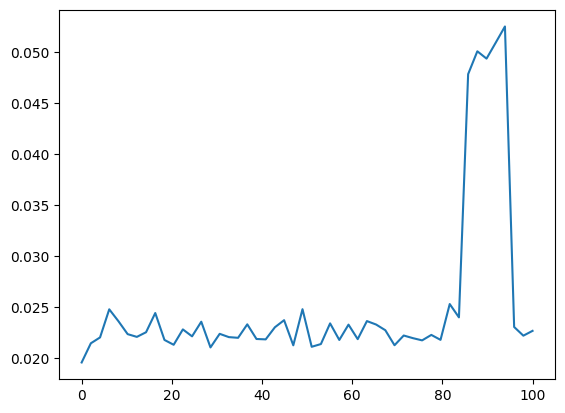

In [ ]:
quick_var(500, 5, 2)